# Testing with apply, foreach and for loops in R

Similar to programs like C or C++, in R you can do looping to do some sort of iteration using for, apply and foreach functions.  

1. for: like any other programming, this loops user defined n time to do something
2. apply: similar to for, apply can iterate over row or column to do a user defined task
3. foreach: this function is like for function but, on steroids. Here, we can use parallel computing to perform for loops in parallel.  

To test out the performance of each of the functions, we will use different data sizes to see which performs better.  
getRes() function will basically look at a row to see it it meets constraints like if number of '1' in a row is less than or equal to something and if it is then it return 1 else 0. We can use this function against a dataframe to compare the results. 
    

In [43]:
library(dplyr)
library(microbenchmark)

In [2]:
getRes = function(combinations) {
  row = combinations
  one = length(which(row==1))
  two = length(which(row==2))
  three = length(which(row==3))
  if(one <= 6) 
    {
      if(two <= 5)
      {
        if(three == 1)
        {
          return(1) 
        }
        else {return(0)}
      }
    else {return(0)}
  }
  else {return(0)}
}

## Apply
Create an apply loop function to run the getRes function. 

In [4]:
apply_loop = function (combinations){
    x1= as.POSIXct(Sys.time())
    res = NULL

    res = apply(combinations,1,getRes)
    x2= as.POSIXct(Sys.time())
    #return(res)
    return(as.difftime(x2-x1, units = "secs"))
}


## Foreach
Create an foreach loop function to run the getRes function. 

In [5]:
library(foreach)
library(doParallel)
library(parallel)

foreach_loop = function (combinations){
    cl <- makeCluster(16)
    clusterExport(cl, c("getRes"))
    registerDoParallel(cl)

    x1= as.POSIXct(Sys.time())

    res = NULL
    res = foreach(i = 1:nrow(combinations), .combine = rbind) %dopar% {
        getRes(combinations[i,])
    }

    x2= as.POSIXct(Sys.time())

    stopCluster(cl)
    #return(res)
    return(as.difftime(x2-x1, units = "secs"))
}


Loading required package: iterators
Loading required package: parallel


## For
Create an for loop function to run the getRes function. 

In [6]:
for_loop = function (combinations){
    x1= as.POSIXct(Sys.time())
    res=NULL
    for(i in 1:nrow(combinations)) {
        res[i] = getRes(combinations[i,])
    }

    x2= as.POSIXct(Sys.time())
    #return(res)
    return(as.difftime(x2-x1, units = "secs"))
}

## Microbenchmark
Do a microbench study to run all different loops and get some statistics. Microbench will perform 5 iterations. Dplyr package is used to group and summarize the data. 

In [7]:
mbLoops1 = NULL
combinations = expand.grid(c(1:3))

mbLoops = function(combinations) {
        res = microbenchmark(apply_loop(combinations), foreach_loop(combinations), for_loop(combinations), times=5)

        res1 = res
        res1$time = res1$time/1000000000

        mb = res1 %>% group_by(expr) %>% summarise (mean = mean(time)
                                              ,sd = sd(time)
                                              ,min = min(time)
                                              ,max = max(time)
                                             )
        mb$size = nrow(combinations)
        return(data.frame(mb))
    }

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)
mbLoops1

expr,mean,sd,min,max,size
apply_loop(combinations),0.005530384,0.005370513,0.000274155,0.013071287,3
foreach_loop(combinations),8.803406354,1.063827929,7.817635844,10.580139362,3
for_loop(combinations),0.002028997,0.003826046,0.000259613,0.008872582,3


Increase the data size and run different loops. 

In [8]:
combinations = expand.grid(c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

expr,mean,sd,min,max,size
apply_loop(combinations),0.0003702156,0.0001160650,0.000245072,0.000558146,9
foreach_loop(combinations),8.9235569714,1.0460634556,7.948781962,10.436508331,9
for_loop(combinations),0.0023198312,0.0003075862,0.002012317,0.002833496,9
apply_loop(combinations),0.0055303840,0.0053705130,0.000274155,0.013071287,3
foreach_loop(combinations),8.8034063536,1.0638279289,7.817635844,10.580139362,3
for_loop(combinations),0.0020289966,0.0038260461,0.000259613,0.008872582,3


In [9]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [10]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [11]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [12]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [13]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [14]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [15]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [20]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

In [21]:
combinations = expand.grid(c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3), c(1:3))

mbLoops1 = rbind(mbLoops(combinations), mbLoops1)

View summarized data metrics. Although its hard to make out the difference we can tell apply method was consistently faster compared to the rest of the function loops. 

In [22]:
mbLoops1 

expr,mean,sd,min,max,size
apply_loop(combinations),1.848387e+00,3.015175e-01,1.471994e+00,2.226259e+00,177147
foreach_loop(combinations),1.756939e+02,4.049650e+00,1.717026e+02,1.804578e+02,177147
for_loop(combinations),1.222849e+02,2.437452e+00,1.186793e+02,1.252447e+02,177147
apply_loop(combinations),6.452159e-01,1.307745e-01,4.601797e-01,7.801982e-01,59049
foreach_loop(combinations),6.246728e+01,7.165803e+00,5.700542e+01,7.461992e+01,59049
for_loop(combinations),3.708779e+01,9.613432e-01,3.541777e+01,3.783785e+01,59049
apply_loop(combinations),2.185719e-01,8.620030e-02,1.540690e-01,3.656175e-01,19683
foreach_loop(combinations),2.780690e+01,4.613920e+00,2.177694e+01,3.357440e+01,19683
for_loop(combinations),1.127049e+01,5.266426e-01,1.063290e+01,1.190946e+01,19683
apply_loop(combinations),5.888674e-02,9.910095e-03,5.019370e-02,6.975744e-02,6561


Let's plot the data to better visualize how everything looks like. 

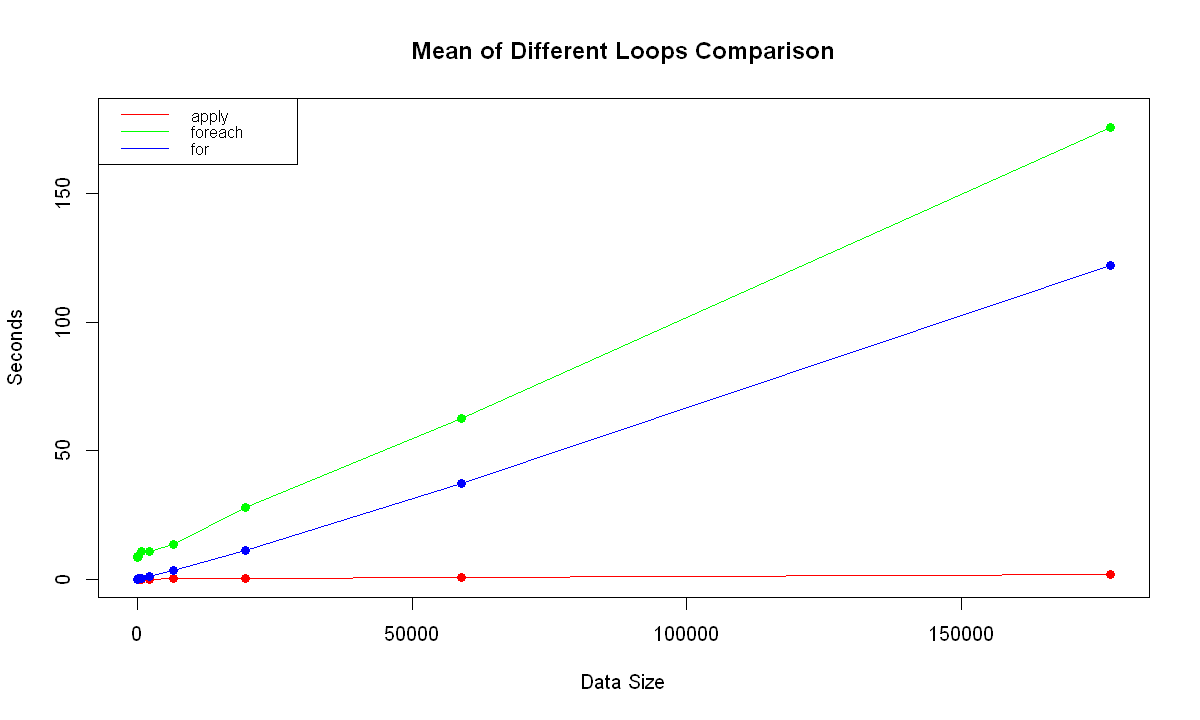

In [41]:
#Adjust plot sizes
options(repr.plot.width=10, repr.plot.height=6)

plot(subset(mbLoops1, expr =='apply_loop(combinations)')$size
     , subset(mbLoops1, expr =='apply_loop(combinations)')$mean
     , type='o'
     , col='red'
     , pch=19
     , ylim = c(0,180)
     , ylab="Seconds"
     , xlab = "Data Size"
     , main = "Mean of Different Loops Comparison"
    )
lines(subset(mbLoops1, expr =='apply_loop(combinations)')$size
     , subset(mbLoops1, expr =='foreach_loop(combinations)')$mean 
     , type='o'
     , col='green'
     , pch=19
    )
lines(subset(mbLoops1, expr =='apply_loop(combinations)')$size
     , subset(mbLoops1, expr =='for_loop(combinations)')$mean
     , type='o'
     , col='blue'
     , pch=19
    )
legend("topleft", c("apply", "foreach", "for"), col = c("red", "green","blue"), lty=1, cex=0.8 )

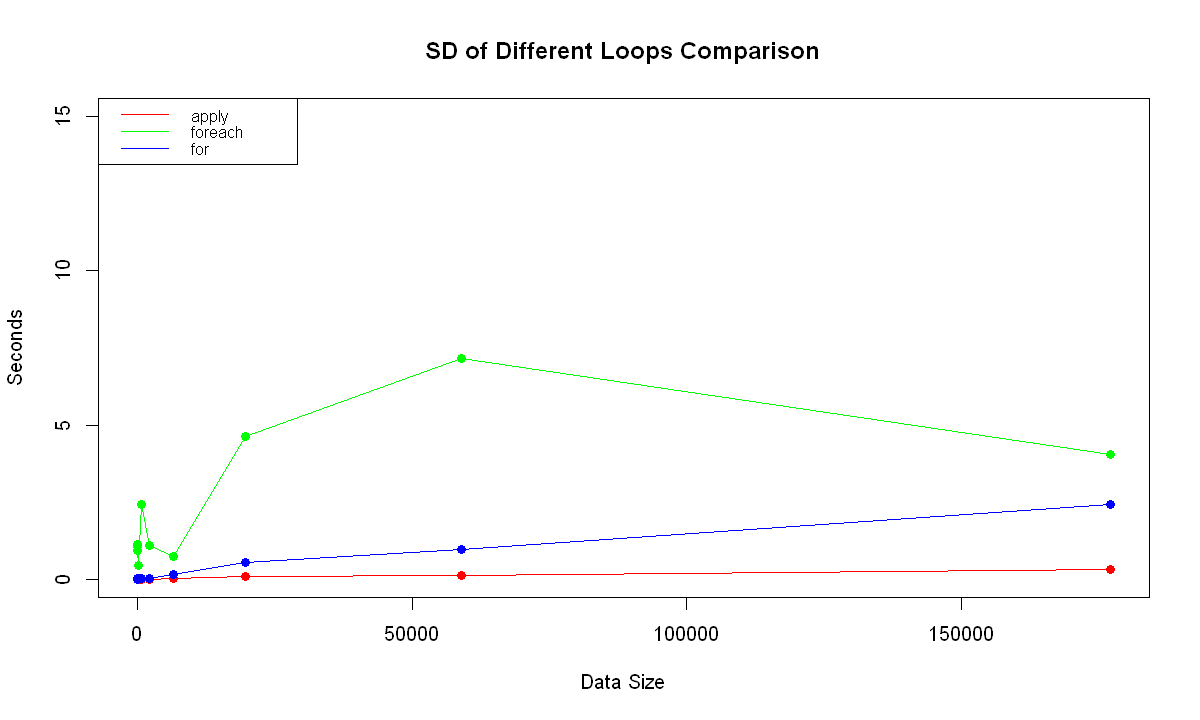

In [42]:
#Adjust plot sizes
options(repr.plot.width=10, repr.plot.height=6)

plot(subset(mbLoops1, expr =='apply_loop(combinations)')$size
     , subset(mbLoops1, expr =='apply_loop(combinations)')$sd
     , type='o'
     , col='red'
     , pch=19
     , ylim = c(0,15)
     , ylab="Seconds"
     , xlab = "Data Size"
     , main = "SD of Different Loops Comparison"
    )
lines(subset(mbLoops1, expr =='apply_loop(combinations)')$size
     , subset(mbLoops1, expr =='foreach_loop(combinations)')$sd
     , type='o'
     , col='green'
     , pch=19
    )
lines(subset(mbLoops1, expr =='apply_loop(combinations)')$size
     , subset(mbLoops1, expr =='for_loop(combinations)')$sd
     , type='o'
     , col='blue'
     , pch=19
    )
legend("topleft", c("apply", "foreach", "for"), col = c("red", "green","blue"), lty=1, cex=0.8 )

From the above study, we can observe that apply loop was consistently much faster compared to either for or foreach loop. As the data size increases, the time to run also increased linearly in for and foreach loop. On the other hand for apply, there was almost no change in time to run apply loop. 

In [38]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 14393)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] doParallel_1.0.13    iterators_1.0.10     foreach_1.5.0       
[4] microbenchmark_1.4-4 dplyr_0.7.8          RevoUtils_11.0.1    
[7] RevoUtilsMath_11.0.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.0           bindr_0.1.1          magrittr_1.5        
 [4] tidyselect_0.2.5     uuid_0.1-2           R6_2.2.2            
 [7] rlang_0.3.1          tools_3.5.1          htmltools_0.3.6     
[10] digest_0.6.15        assertthat_0.2.0     tibble_1.4.2        
[13] crayon_1.3.4    